In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv('drug.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [5]:
df.isnull().sum()





x = df.iloc[:, 0:5]
y = df.iloc[:, -1]

x

y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [6]:
y = pd.get_dummies(y)
x = pd.get_dummies(x, columns = ['Sex', 'BP', 'Cholesterol']) 

In [7]:
y

,drugA,drugB,drugC,drugX,drugY
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
195,0,0,1,0,0
196,0,0,1,0,0
197,0,0,0,1,0
198,0,0,0,1,0


In [8]:
x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

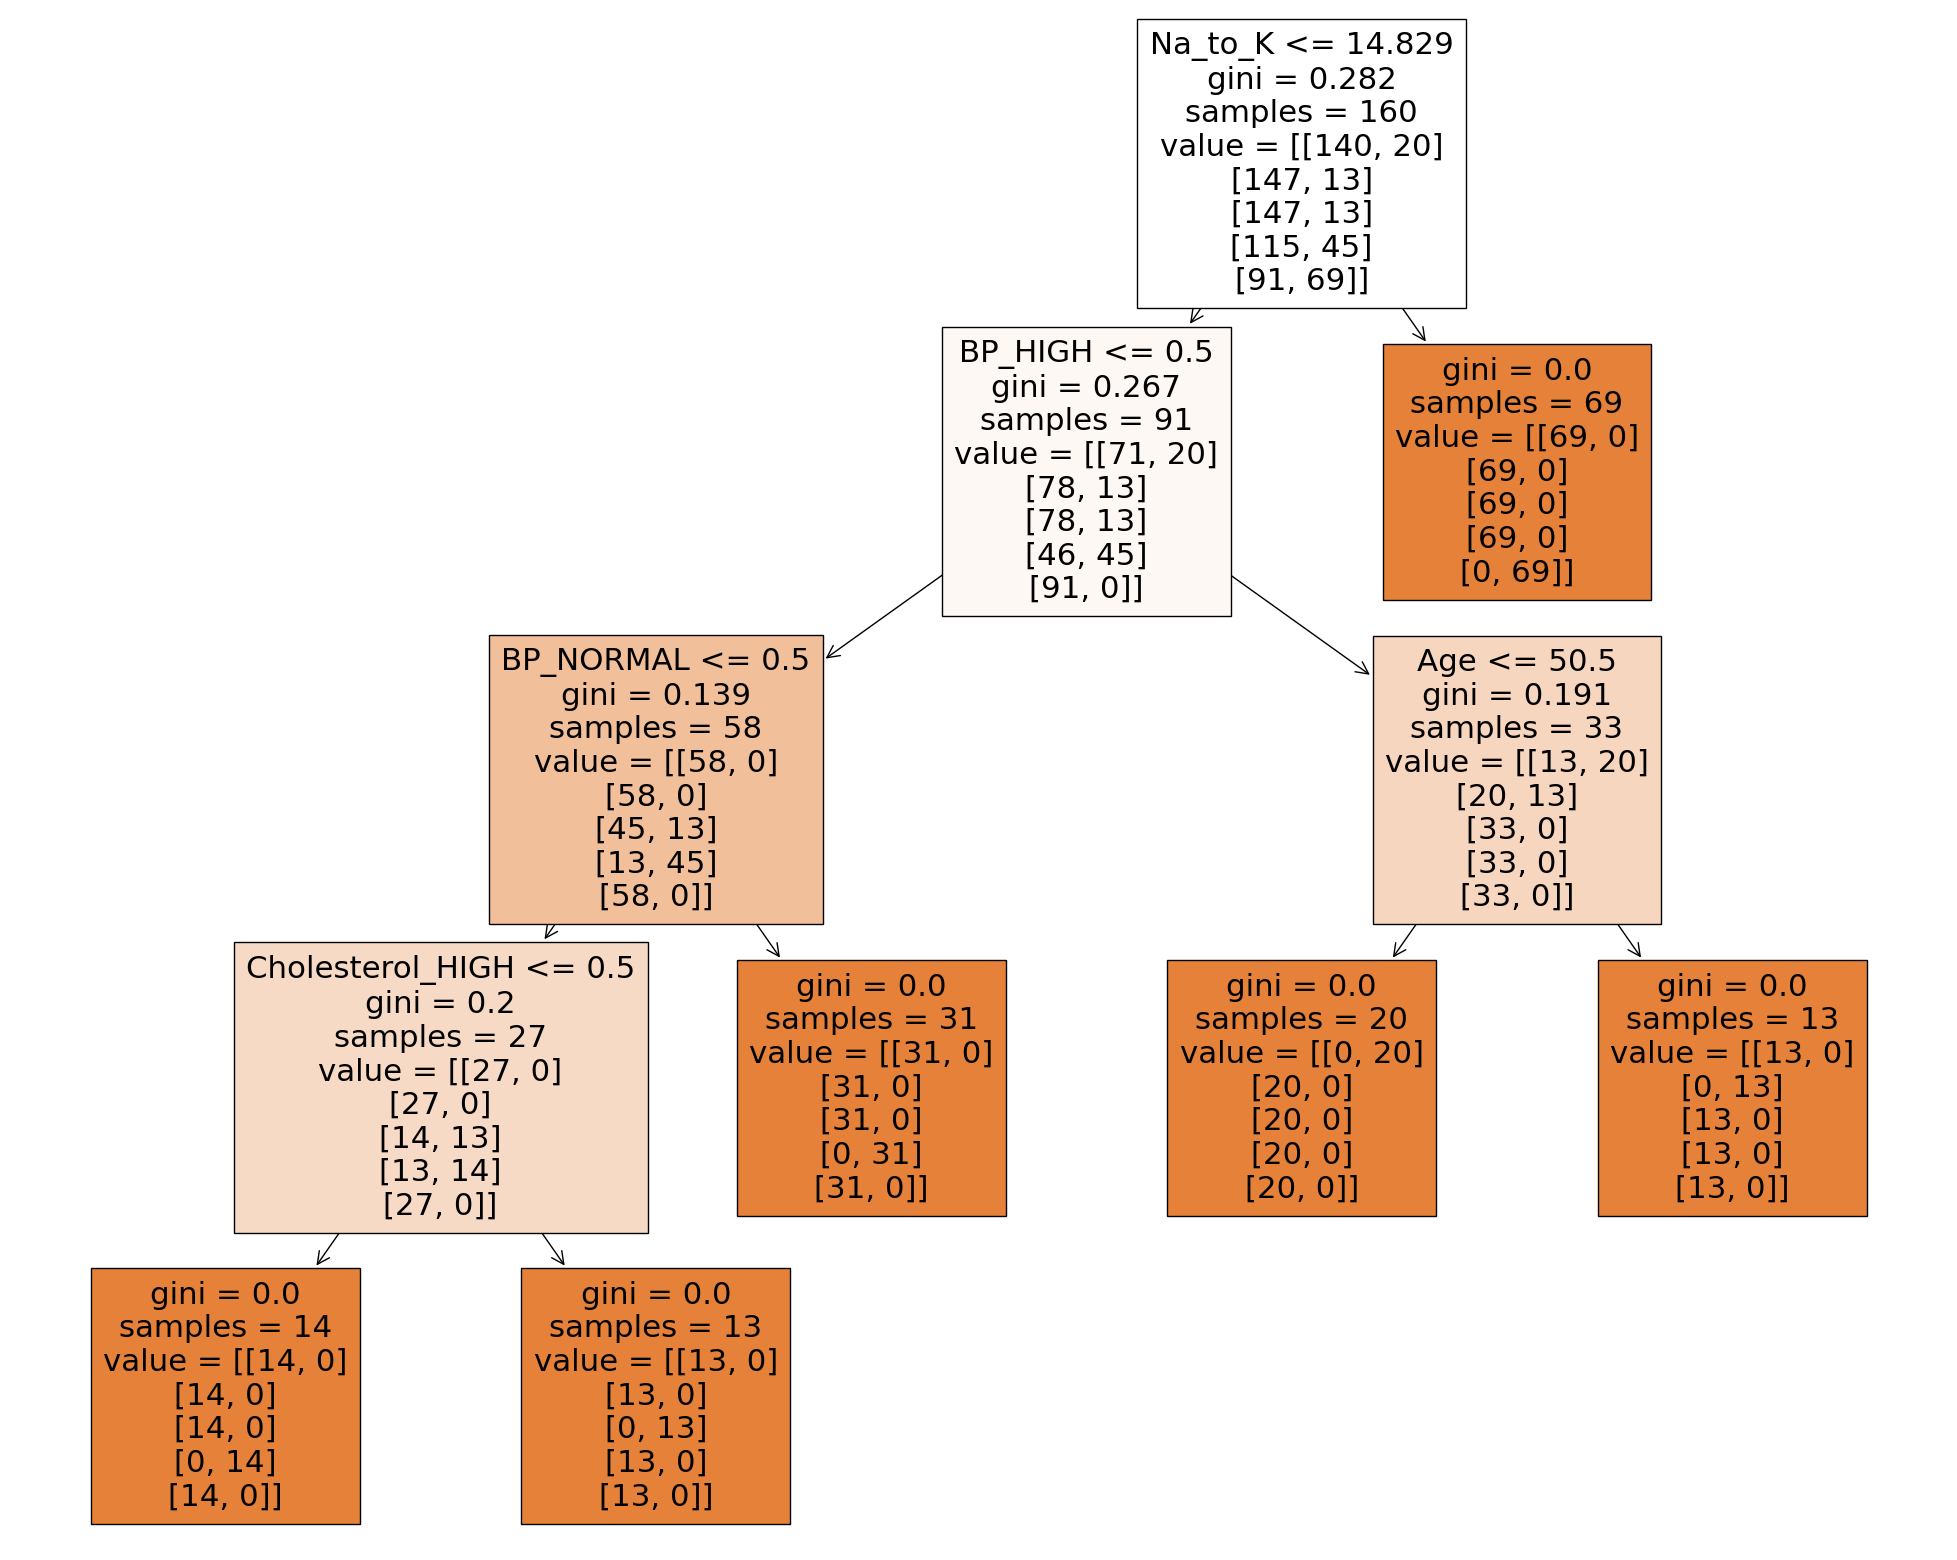

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names= x.columns.tolist(),  
                   class_names= y.columns.tolist(),
                   filled=True)

In [11]:
y_pred = dt.predict(x_test)

from sklearn import metrics
print('Precisoin : ', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('Recall : ', metrics.recall_score(y_test, y_pred, average="micro"))

Precisoin :  1.0
Accuracy :  1.0
Recall :  1.0
